In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
n=5

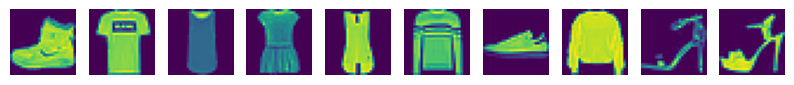

label for each of these above images: [9 0 0 3 0 2 7 2 5 5]


In [ ]:
#visualizing first 10 images
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()
print("label for each of these above images: %s" %(y_train[0:10]))

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

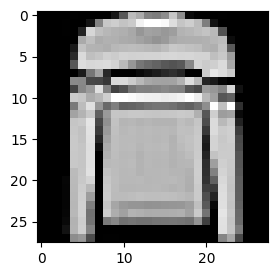

Label:  2


In [ ]:
plt.figure(figsize=[3,3])
plt.imshow(X_train[n],cmap='gray')
plt.show()
print('Label: ',y_train[n])

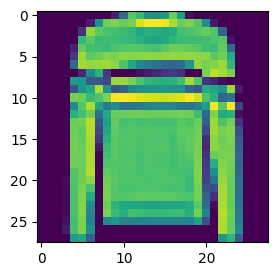

Label:  2


In [ ]:
plt.figure(figsize=[3,3])
plt.imshow(X_train[n])   #color
plt.show()
print('Label: ',y_train[n])

**data pre-processing**

for computer vision it's required to mention the channel number but in NN it's not required

In [ ]:
#reshaping X data: (n,28,28) into => (n,784)
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0],-1))

In [ ]:
#converting the y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


**Basic NN model**

Naive MLP model without any alternations

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50,input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
# Compile the model
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 200, epochs =100, verbose =1)

Epoch 1/100
300/300 [==============================] - 7s 3ms/step - loss: 2.3222 - accuracy: 0.1032
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2995 - accuracy: 0.1479
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2975 - accuracy: 0.1678
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2954 - accuracy: 0.1897
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2932 - accuracy: 0.2280
Epoch 6/100
300/300 [==============================] - 1s 5ms/step - loss: 2.2909 - accuracy: 0.2572
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2880 - accuracy: 0.2826
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2845 - accuracy: 0.2771
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.3382
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2748 - accura

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7183 - accuracy: 0.7566


In [ ]:
print('Test accuracy: ',results[1])

Test accuracy:  0.756600022315979


**wegiht initialization**

In [ ]:
#also creating a function to generate return models

def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784, ), kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(10, kernel_initializer = 'he_normal'))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model



In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 200, epochs =100, verbose =1)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 2.3742 - accuracy: 0.1000
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3340 - accuracy: 0.1000
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3159 - accuracy: 0.1000
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3071 - accuracy: 0.1006
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1069
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1300
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2988 - accuracy: 0.1684
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2978 - accuracy: 0.2018
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2969 - accuracy: 0.2109
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2961 - accura

In [ ]:
results = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.1981 - accuracy: 0.3841


In [ ]:
print('Test accuracy: ',results[1])

Test accuracy:  0.3840999901294708


In [ ]:
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784, ), ))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = mlp_model()
history = model.fit(X_train, y_train,   epochs =10, verbose =1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0379 - accuracy: 0.6954
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5949 - accuracy: 0.7853
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5281 - accuracy: 0.8127
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4903 - accuracy: 0.8247
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4636 - accuracy: 0.8337
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4458 - accuracy: 0.8390
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4307 - accuracy: 0.8457
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4178 - accuracy: 0.8489
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4073 - accuracy: 0.8538
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.399

In [ ]:

results = model.evaluate(X_test, y_test)
print('Test accuracy: ',results[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4474 - accuracy: 0.8413
Test accuracy:  0.8413000106811523


**Batch Normalization**

In [ ]:

from tensorflow.keras.layers import BatchNormalization

def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784, ), ))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = mlp_model()
history = model.fit(X_train, y_train,   epochs =20, verbose =1)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3364 - accuracy: 0.5853
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8362 - accuracy: 0.7465
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6994 - accuracy: 0.7782
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6293 - accuracy: 0.7941
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5872 - accuracy: 0.8048
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5579 - accuracy: 0.8133
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5325 - accuracy: 0.8195
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5130 - accuracy: 0.8253
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4954 - accuracy: 0.8305
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.48

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ',results[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.3918 - accuracy: 0.8637
Test accuracy:  0.8636999726295471


***Dropout***

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784, ), ))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = mlp_model()
history = model.fit(X_train, y_train,   epochs =20, verbose =1)


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.9179 - accuracy: 0.3343
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4255 - accuracy: 0.5420
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2178 - accuracy: 0.6075
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0986 - accuracy: 0.6377
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0111 - accuracy: 0.6636
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9561 - accuracy: 0.6783
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9179 - accuracy: 0.6882
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8739 - accuracy: 0.7054
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8474 - accuracy: 0.7118
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ',results[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4872 - accuracy: 0.8240
Test accuracy:  0.8240000009536743
